# Comprehensive Health Risk Assessment and Predictive Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading dataset
df = pd.read_csv('health_dataset.csv')

df.columns = [col.replace(' ', '') for col in df.columns]

# Spliting the data into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Check for missing values
missing_values = df.isnull().sum()

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None) # auto-detect width
pd.set_option('display.max_colwidth', None) # display full column contents

# Print the number of missing values for each column
print("Missing Values per Column:")
print(missing_values)

# Check for the percentage of missing values.
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)


Missing Values per Column:
ADM_RNO1                        0
Province                        0
Health_region_grouped           0
Gender                          0
Marital_status                  0
Household                       0
Age                             0
Worked_job_business             0
Edu_level                       0
Gen_health_state                0
Life_satisfaction               0
Mental_health_state             0
Stress_level                    0
Work_stress                     0
Sense_belonging                 0
Weight_state                    0
BMI_12_17                       0
BMI_18_above                    0
Sleep_apnea                     0
High_BP                         0
High_cholestrol                 0
Diabetic                        0
Fatigue_syndrome                0
Mood_disorder                   0
Anxiety_disorder                0
Respiratory_chronic_con         0
Musculoskeletal_con             0
Cardiovascular_con              0
Health_utility_indx  

In [3]:
df.head()

,ADM_RNO1,Province,Health_region_grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,Life_satisfaction,Mental_health_state,Stress_level,Work_stress,Sense_belonging,Weight_state,BMI_12_17,BMI_18_above,Sleep_apnea,High_BP,High_cholestrol,Diabetic,Fatigue_syndrome,Mood_disorder,Anxiety_disorder,Respiratory_chronic_con,Musculoskeletal_con,Cardiovascular_con,Health_utility_indx,Pain_status,Act_improve_health,Fruit_veg_con,Smoked,Tobaco_use,weekly_alcohol,Cannabies_use,Drug_use,Total_active_time,Total_physical_act_time,Other_physical_act_time,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
0,1000,47,47906,2,1,2,3,1,3,3,9,3,2,2,2,3,6,2,2,2,2,2,2,2,2,2,2,2,1,2,6,1.3,996.0,6,996,2,2,0,0,60,10,38,1,2,1,2,1,0,1,5
1,100005,47,47906,1,1,2,5,6,2,3,4,3,3,6,3,1,6,2,1,1,2,2,2,1,2,2,2,2,9,1,6,1.0,996.0,6,996,2,2,0,0,0,0,96,6,2,1,2,1,0,2,4
2,100012,59,59914,2,2,1,5,6,1,2,7,3,3,6,2,1,6,2,2,1,2,1,2,2,2,1,1,2,1,1,6,9999.6,996.0,2,996,2,2,9996,9996,9996,9996,96,6,2,1,2,6,6,2,2
3,100015,13,13904,1,2,1,5,6,1,3,8,3,3,6,2,1,6,2,2,1,2,2,2,2,2,2,1,2,2,1,6,9999.6,996.0,6,996,2,6,9996,9996,9996,9996,96,6,2,1,2,6,0,2,3
4,100018,46,46903,1,2,1,4,2,3,5,0,5,4,6,3,3,6,2,2,1,2,9,2,2,2,9,1,9,1,2,6,9999.6,996.0,6,996,2,2,9996,9996,9996,9996,96,6,2,1,2,2,0,2,1


### **1. Data Dictionary**

| Column Name                     | Description |
|---------------------------------|-------------|
| ADM_RNO1                        | Unique administrative record number |
| Province                        | Province where the respondent resides (see encoding guide below) |
| Health_region_grouped           | Grouped health region of residence |
| Gender                          | Respondent's gender |
| Marital_status                  | Current marital status |
| Household                       | Type of household composition |
| Age                             | Age of respondent (years) |
| Worked_job_business             | Whether the respondent worked at a job or business in the past 12 months |
| Edu_level                       | Highest level of education attained |
| Gen_health_state                | General health self-assessment |
| Life_satisfaction               | Self-rated life satisfaction |
| Mental_health_state             | Self-rated mental health status |
| Stress_level                    | Perceived stress level in daily life |
| Work_stress                     | Stress experienced at work |
| Sense_belonging                 | Sense of belonging to community |
| Weight_state                    | Weight status based on BMI categories |
| BMI_12_17                       | Body Mass Index for respondents aged 12-17 |
| BMI_18_above                    | Body Mass Index for respondents aged 18 and above |
| Sleep_apnea                     | Diagnosed with sleep apnea (yes/no) |
| High_BP                         | Diagnosed with high blood pressure (yes/no) |
| High_cholesterol                | Diagnosed with high cholesterol (yes/no) |
| Diabetic                        | Diagnosed with diabetes (yes/no) |
| Fatigue_syndrome                | Diagnosed with chronic fatigue syndrome (yes/no) |
| Mood_disorder                   | Diagnosed with a mood disorder (yes/no) |
| Anxiety_disorder                | Diagnosed with an anxiety disorder (yes/no) |
| Respiratory_chronic_con         | Diagnosed with chronic respiratory condition (yes/no) |
| Musculoskeletal_con             | Diagnosed with musculoskeletal condition (yes/no) |
| Cardiovascular_con              | Diagnosed with cardiovascular condition (yes/no) |
| Health_utility_index            | Health Utility Index score |
| Pain_status                     | Frequency and severity of pain |
| Act_improve_health              | Engaged in activities to improve health |
| Fruit_veg_con                   | Daily consumption of fruits and vegetables |
| Smoked                          | Smoking status |
| Tobacco_use                     | Tobacco product consumption |
| Weekly_alcohol                  | Frequency of alcohol consumption per week |
| Cannabis_use                    | Cannabis use in the past 12 months |
| Drug_use                        | Illicit drug use in the past 12 months |
| Total_active_time               | Total time spent on physical activities |
| Total_physical_act_time         | Total duration of physical activities per week |
| Other_physical_act_time         | Time spent on other physical activities |
| Physical_vigorous_act_time      | Time spent on vigorous physical activity |
| Work_hours                      | Number of hours worked per week |
| Working_status                  | Employment status (employed, unemployed, retired, etc.) |
| Aboriginal_identity              | Whether the respondent identifies as Aboriginal |
| Birth_country                   | Country of birth |
| Immigrant                       | Immigration status |
| Insurance_cover                 | Type of health insurance coverage |
| Food_security                   | Household food security status |
| Income_source                   | Primary source of income |
| Total_income                    | Total annual income |

In [4]:
# Filling missing values through Mode Imputation method
train_df['Smoked'] = train_df['Smoked'].fillna(0)

# Applying the same imputation to validation and test sets
validation_df['Smoked'] = validation_df['Smoked'].fillna(0)
test_df['Smoked'] = test_df['Smoked'].fillna(0)

# Dropping useless columns
train_df = train_df.drop('ADM_RNO1', axis=1)
validation_df = validation_df.drop('ADM_RNO1', axis=1)
test_df = test_df.drop('ADM_RNO1', axis=1)

train_df = train_df.drop('Province', axis=1)
validation_df = validation_df.drop('Province', axis=1)
test_df = test_df.drop('Province', axis=1)

train_df = train_df.drop('Health_region_grouped', axis=1)
validation_df = validation_df.drop('Health_region_grouped', axis=1)
test_df = test_df.drop('Health_region_grouped', axis=1)

Descriptive Statistics (Numerical Columns):
             Gender  Marital_status     Household           Age  \
count  75776.000000    75776.000000  75776.000000  75776.000000   
mean       1.543827        1.747849      1.721389      3.826911   
std        0.498079        1.257530      0.686640      1.293293   
min        1.000000        1.000000      1.000000      1.000000   
25%        1.000000        1.000000      1.000000      3.000000   
50%        2.000000        1.000000      2.000000      4.000000   
75%        2.000000        2.000000      2.000000      5.000000   
max        2.000000        9.000000      9.000000      5.000000   

       Worked_job_business     Edu_level  Gen_health_state  Life_satisfaction  \
count         75776.000000  75776.000000      75776.000000       75776.000000   
mean              3.660460      3.009726          2.442937          11.574707   
std               2.458167      1.576802          1.063086          17.577011   
min               1.000000  

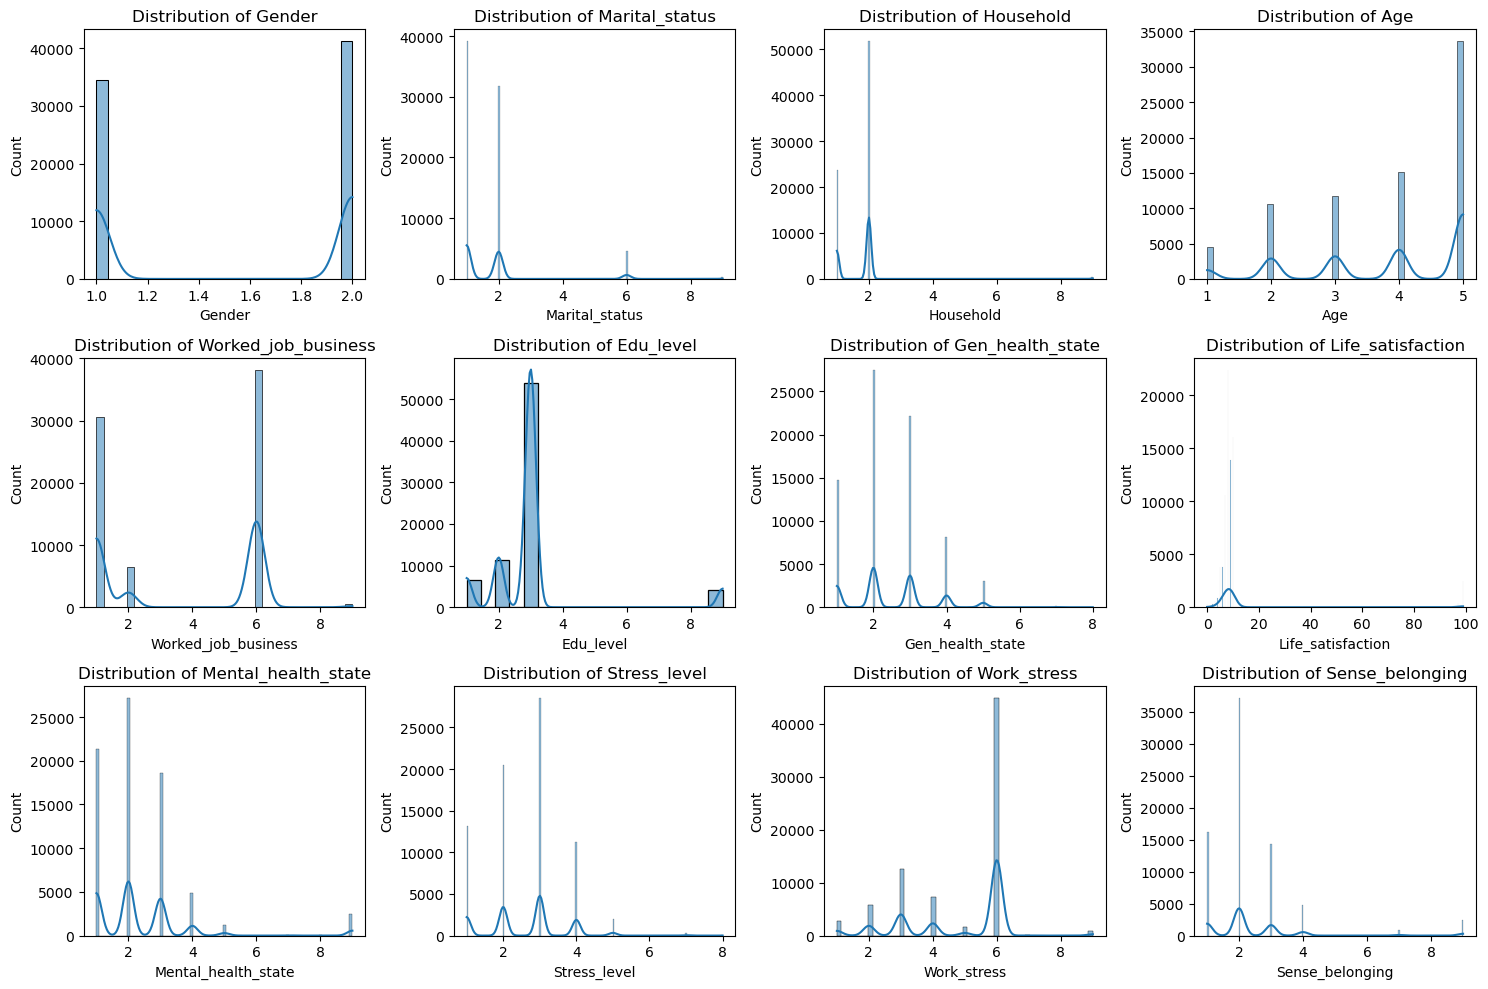

<Figure size 1500x1000 with 0 Axes>

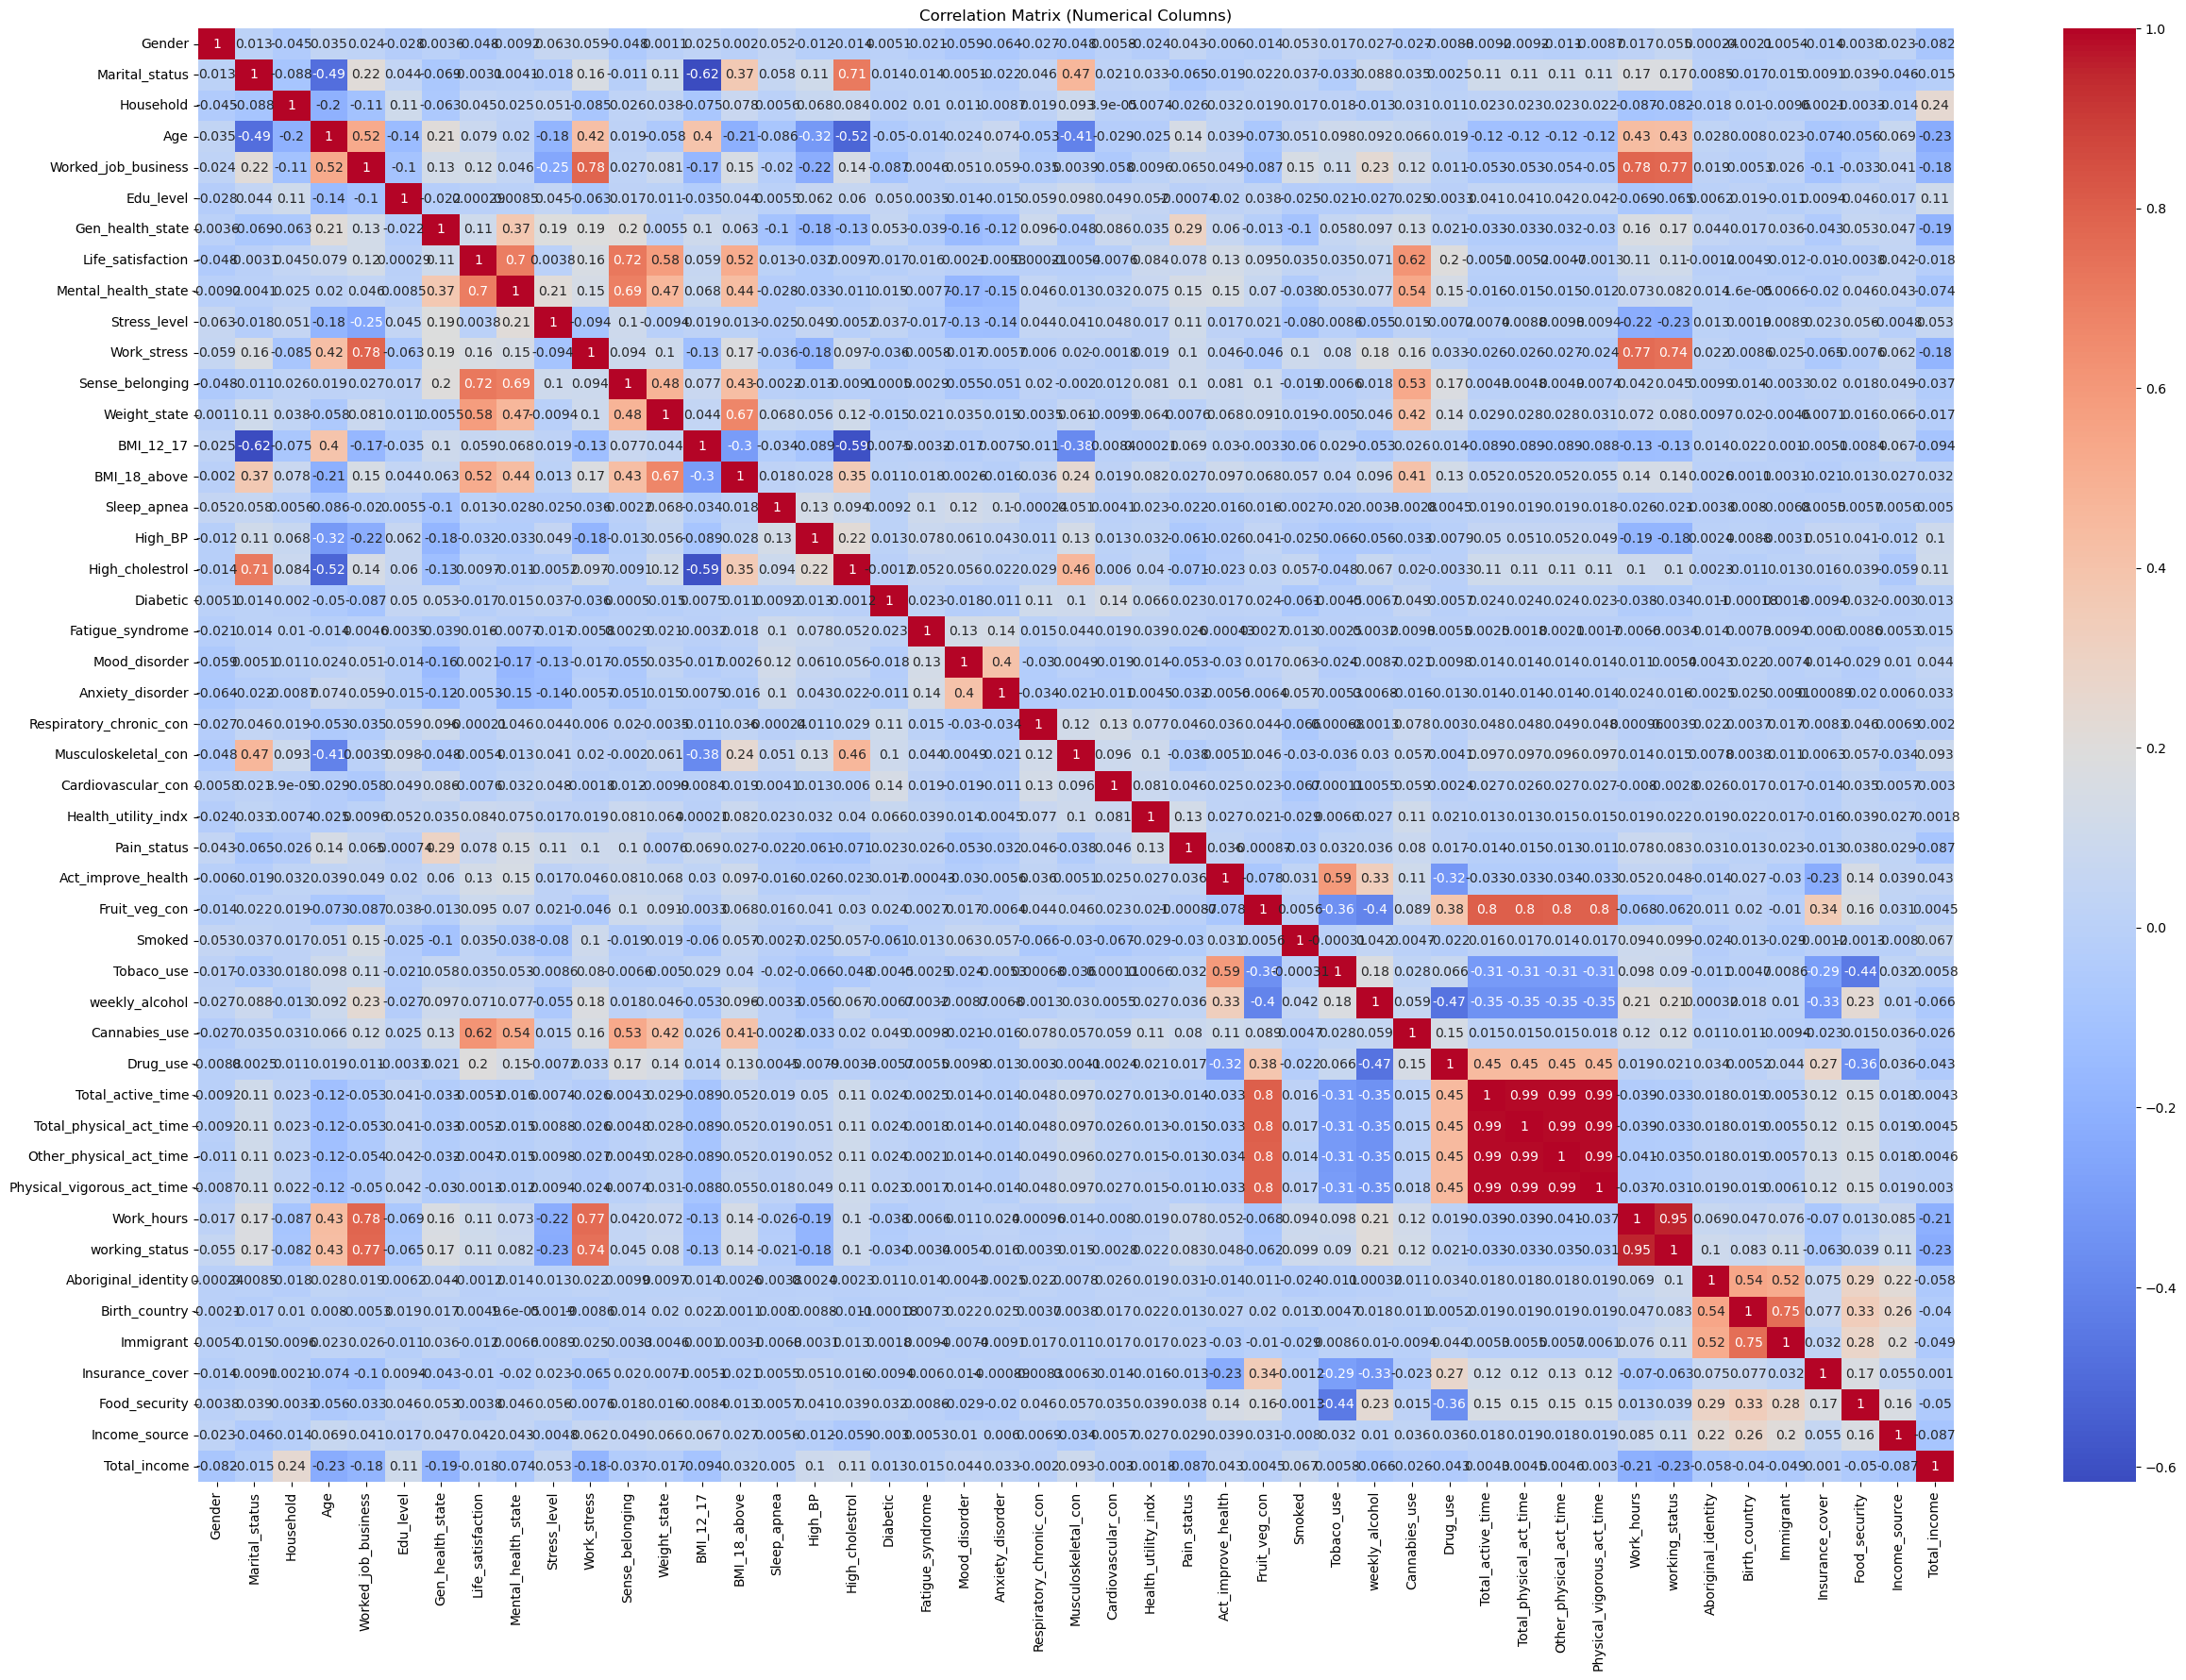

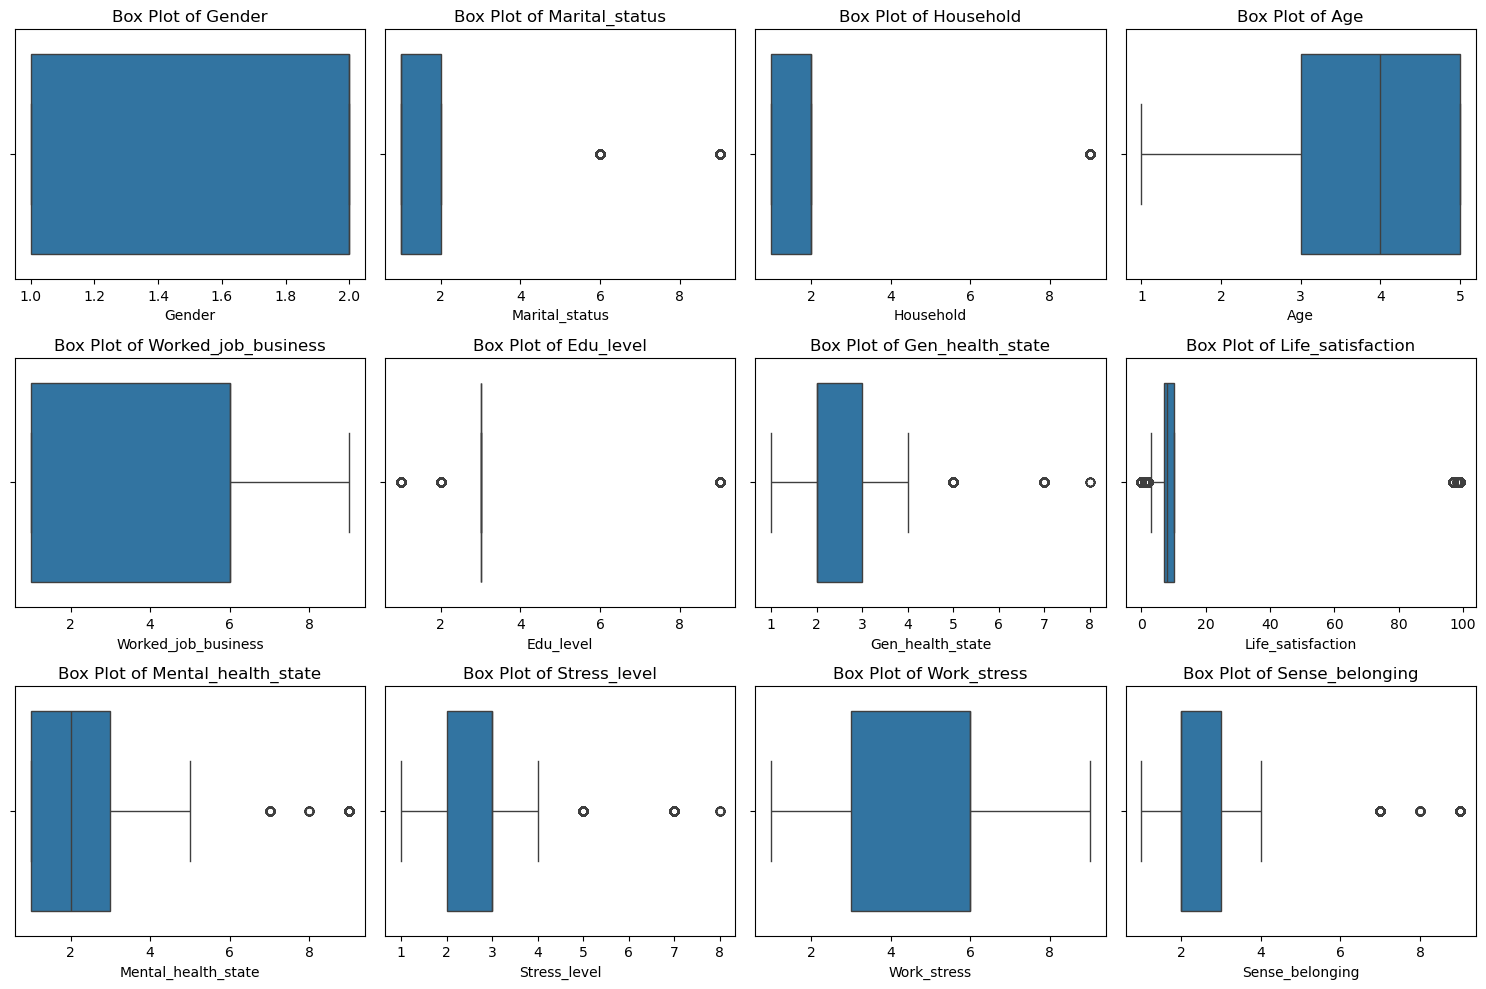

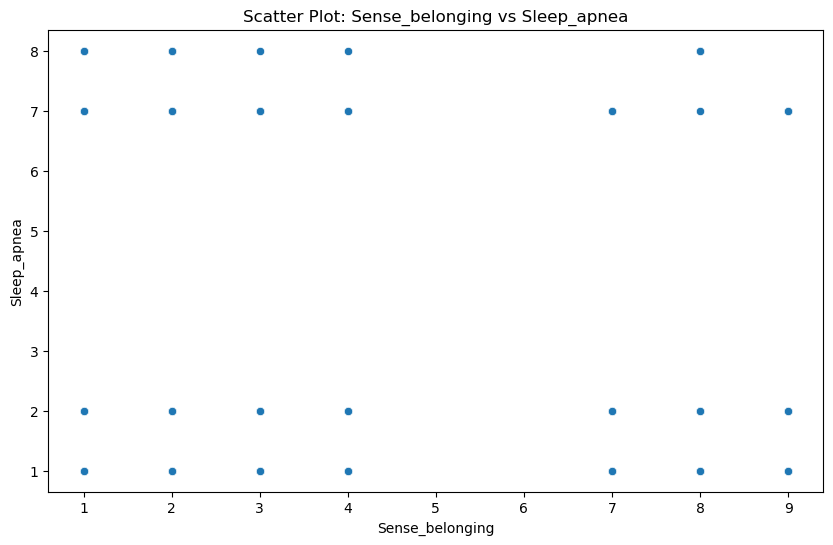


Unique values in Gender: [1 2]

Unique values in Marital_status: [1 2 9 6]

Unique values in Household: [2 1 9]

Unique values in Age: [5 2 4 3 1]

Unique values in Worked_job_business: [6 1 2 9 7 8]

Unique values in Edu_level: [3 2 1 9]

Unique values in Gen_health_state: [2 3 1 7 4 5 8]

Unique values in Life_satisfaction: [10  9  4  7  8  5  6 99 97  1  3  2  0 98]

Unique values in Mental_health_state: [3 2 1 4 9 5 7 8]

Unique values in Stress_level: [1 2 3 4 5 7 8]

Unique values in Work_stress: [6 3 5 2 4 1 9 7 8]

Unique values in Sense_belonging: [2 3 1 4 7 9 8]

Unique values in Weight_state: [1 3 2 9 6 7 8]

Unique values in BMI_12_17: [6 1 2 9]

Unique values in BMI_18_above: [1 2 9 6]

Unique values in Sleep_apnea: [2 1 7 8]

Unique values in High_BP: [2 1 7 8]

Unique values in High_cholestrol: [2 1 6 7 8]

Unique values in Diabetic: [2 9 1 7 8]

Unique values in Fatigue_syndrome: [2 1 7 8]

Unique values in Mood_disorder: [2 1 8 7]

Unique values in Anxiety_disorder: [

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# 1. Descriptive Statistics (Numerical Columns)
numerical_cols = train_df.select_dtypes(include=np.number).columns
print("Descriptive Statistics (Numerical Columns):")
print(train_df[numerical_cols].describe())

# 2. Visualize Distributions (Numerical Columns) - Subset
selected_cols = numerical_cols[:12]  # Select the first 12 columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3. Visualize Distributions (Categorical Columns)
categorical_cols = train_df.select_dtypes(include='object').columns[:12]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# 4. Identify Correlations (Numerical Columns)
correlation_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

# 5. Look for Outliers and Anomalies (Box Plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:12]):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# 6. Look for Outliers and Anomalies(Scatter plots for relationships)
# Select a few columns, that you think might have a relationship.
if(len(numerical_cols) >=2):
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=numerical_cols[11], y=numerical_cols[15], data=train_df)
  plt.title(f'Scatter Plot: {numerical_cols[11]} vs {numerical_cols[15]}')
  plt.show()

# 7. Value Counts for Categorical Features
for column in categorical_cols:
  print(f"\nValue Counts for {column}:")
  print(train_df[column].value_counts())

# 8. Check for Unique Values
for column in train_df.columns:
  print(f"\nUnique values in {column}: {train_df[column].unique()}")

In [6]:
# Droping correlated columns
def remove_correlated_features(df, correlation_threshold=0.95):

    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    df = df.drop(to_drop, axis=1)
    return df

# Removing correlated features from train_df, validation_df, and test_df
train_df = remove_correlated_features(train_df)
validation_df = remove_correlated_features(validation_df)
test_df = remove_correlated_features(test_df)

print("Columns after removing correlated features:")
print(train_df.columns)

Columns after removing correlated features:
Index(['Gender', 'Marital_status', 'Household', 'Age', 'Worked_job_business',
       'Edu_level', 'Gen_health_state', 'Life_satisfaction',
       'Mental_health_state', 'Stress_level', 'Work_stress', 'Sense_belonging',
       'Weight_state', 'BMI_12_17', 'BMI_18_above', 'Sleep_apnea', 'High_BP',
       'High_cholestrol', 'Diabetic', 'Fatigue_syndrome', 'Mood_disorder',
       'Anxiety_disorder', 'Respiratory_chronic_con', 'Musculoskeletal_con',
       'Cardiovascular_con', 'Health_utility_indx', 'Pain_status',
       'Act_improve_health', 'Fruit_veg_con', 'Smoked', 'Tobaco_use',
       'weekly_alcohol', 'Cannabies_use', 'Drug_use', 'Total_active_time',
       'Work_hours', 'Aboriginal_identity', 'Birth_country', 'Immigrant',
       'Insurance_cover', 'Food_security', 'Income_source', 'Total_income'],
      dtype='object')


In [7]:
# Scaling data
def min_max_scale_columns(train, val, test, columns, scaler):
    for column in columns:
        train[column] = scaler.fit_transform(train[[column]])
        val[column] = scaler.transform(val[[column]])
        test[column] = scaler.transform(test[[column]])
    return train, val, test

scaler = MinMaxScaler(feature_range=(0, 10))
columns_to_scale = ['Total_active_time', 'Life_satisfaction', 'weekly_alcohol', 'Fruit_veg_con', 'Smoked']
train_df, validation_df, test_df = min_max_scale_columns(
    train_df, validation_df, test_df, columns_to_scale, scaler
)

In [8]:
# Feature engineering
def create_features(feat_df):

    feat_df['age_smoking'] = feat_df['Age'] * feat_df['Smoked']
    feat_df['age_alcohol'] = feat_df['Age'] * feat_df['weekly_alcohol']
    feat_df['age_activity'] = feat_df['Age'] * feat_df['Total_active_time']
    feat_df['age_bmi'] = feat_df['Age'] * feat_df['BMI_18_above']

    # Socioeconomic Factors * Health Behaviors
    feat_df['edu_smoking'] = feat_df['Edu_level'] * feat_df['Smoked']
    feat_df['income_food'] = feat_df['Total_income'] * feat_df['Food_security']
    feat_df['income_stress'] = feat_df['Total_income'] * feat_df['Stress_level']
    feat_df['insurance_health'] = feat_df['Insurance_cover'] * feat_df['Health_utility_indx']

    # Mental Health * Physical Health
    feat_df['mental_bmi'] = feat_df['Mental_health_state'] * feat_df['BMI_18_above']
    feat_df['stress_bp'] = feat_df['Stress_level'] * feat_df['High_BP']
    feat_df['anxiety_sleep'] = feat_df['Anxiety_disorder'] * feat_df['Sleep_apnea']
    feat_df['mood_pain'] = feat_df['Mood_disorder'] * feat_df['Pain_status']

    # Lifestyle Habits
    feat_df['smoke_alcohol'] = feat_df['Smoked'] * feat_df['weekly_alcohol']
    feat_df['fruit_activity'] = feat_df['Fruit_veg_con'] * feat_df['Total_active_time']
    feat_df['cannabis_drug'] = feat_df['Cannabies_use'] * feat_df['Drug_use']

    # BMI Interactions
    feat_df['bmi_activity'] = feat_df['BMI_18_above'] * feat_df['Total_active_time']
    feat_df['bmi_fruit'] = feat_df['BMI_18_above'] * feat_df['Fruit_veg_con']
    feat_df['bmi_smoke'] = feat_df['BMI_18_above'] * feat_df['Smoked']

    # Composite Risk Scores
    denominator = np.where(feat_df['Total_active_time'] + feat_df['Fruit_veg_con'] == 0, 1, (feat_df['Total_active_time'] + feat_df['Fruit_veg_con']))
    feat_df['lifestyle_risk'] = ((
        feat_df['Smoked'] +
        feat_df['weekly_alcohol'] +
        feat_df['Age'] +
        feat_df['Drug_use'] + 
        feat_df['Tobaco_use']) /
        denominator
    )

    feat_df['mental_risk'] = (
        feat_df['Mental_health_state'] +
        feat_df['Stress_level'] +
        feat_df['Anxiety_disorder'] +
        feat_df['Mood_disorder']
    )

    feat_df['cardio_risk'] = (
        feat_df['High_BP'] +
        feat_df['High_cholestrol'] +
        feat_df['Cardiovascular_con'] +
        feat_df['Age'] +
        feat_df['Smoked']
    )

    feat_df['socio_risk'] = 1/((
        feat_df['Edu_level'] +
        feat_df['Total_income'] +
        feat_df['Food_security'] +
        feat_df['Insurance_cover'])
    )
    feat_df['socio_risk'] = np.where(np.isinf(feat_df['socio_risk']), 1, feat_df['socio_risk'])
        
    
    denominator = np.where(feat_df['Total_active_time'] == 0, 1, feat_df['Total_active_time'])
    feat_df['pain_move_risk'] = ((
        feat_df['Pain_status'] +
        feat_df['Musculoskeletal_con']) /
        denominator
    )

    # Work_hours Interaction Features
    feat_df['work_stress'] = feat_df['Work_hours'] * feat_df['Stress_level']
    feat_df['work_lifestyle'] = feat_df['Work_hours'] * feat_df['lifestyle_risk']
    feat_df['work_mental'] = feat_df['Work_hours'] * feat_df['mental_risk']
    feat_df['work_socio'] = feat_df['Work_hours'] * feat_df['socio_risk']

    # Categorical Work_hours Feature
    feat_df['work_hours_cat'] = pd.cut(feat_df['Work_hours'], bins=[0, 40, 60, 99], labels=['less_than_40', '40-60', 'more_than_60'])

    return feat_df

# Applying feature creation
train_df = create_features(train_df.copy())
validation_df = create_features(validation_df.copy())
test_df = create_features(test_df.copy())


# one hot encode the categorical work hours feature.
train_df = pd.get_dummies(train_df, columns = ["work_hours_cat"], dummy_na=True)
validation_df = pd.get_dummies(validation_df, columns = ["work_hours_cat"], dummy_na=True)
test_df = pd.get_dummies(test_df, columns = ["work_hours_cat"], dummy_na=True)


print(train_df.columns)

Index(['Gender', 'Marital_status', 'Household', 'Age', 'Worked_job_business',
       'Edu_level', 'Gen_health_state', 'Life_satisfaction',
       'Mental_health_state', 'Stress_level', 'Work_stress', 'Sense_belonging',
       'Weight_state', 'BMI_12_17', 'BMI_18_above', 'Sleep_apnea', 'High_BP',
       'High_cholestrol', 'Diabetic', 'Fatigue_syndrome', 'Mood_disorder',
       'Anxiety_disorder', 'Respiratory_chronic_con', 'Musculoskeletal_con',
       'Cardiovascular_con', 'Health_utility_indx', 'Pain_status',
       'Act_improve_health', 'Fruit_veg_con', 'Smoked', 'Tobaco_use',
       'weekly_alcohol', 'Cannabies_use', 'Drug_use', 'Total_active_time',
       'Work_hours', 'Aboriginal_identity', 'Birth_country', 'Immigrant',
       'Insurance_cover', 'Food_security', 'Income_source', 'Total_income',
       'age_smoking', 'age_alcohol', 'age_activity', 'age_bmi', 'edu_smoking',
       'income_food', 'income_stress', 'insurance_health', 'mental_bmi',
       'stress_bp', 'anxiety_sleep', 

In [9]:
missing_values = train_df.isnull().sum()

# Print the number of missing values for each column
print("Missing Values per Column:")
print(missing_values)

# Negative values analysis
negative_values = {}
for col in train_df.columns:
    if pd.api.types.is_numeric_dtype(train_df[col]):
        negative_count = (train_df[col] < 0).sum()
        negative_values[col] = negative_count

print("Negative Values per Column:")
print(pd.Series(negative_values))

Missing Values per Column:
Gender                         0
Marital_status                 0
Household                      0
Age                            0
Worked_job_business            0
Edu_level                      0
Gen_health_state               0
Life_satisfaction              0
Mental_health_state            0
Stress_level                   0
Work_stress                    0
Sense_belonging                0
Weight_state                   0
BMI_12_17                      0
BMI_18_above                   0
Sleep_apnea                    0
High_BP                        0
High_cholestrol                0
Diabetic                       0
Fatigue_syndrome               0
Mood_disorder                  0
Anxiety_disorder               0
Respiratory_chronic_con        0
Musculoskeletal_con            0
Cardiovascular_con             0
Health_utility_indx            0
Pain_status                    0
Act_improve_health             0
Fruit_veg_con                  0
Smoked          

In [10]:
numerical_cols = train_df.select_dtypes(include=np.number).columns
infinite_values = np.isinf(train_df[numerical_cols])
print("Columns with infinite values:")
print(infinite_values.any())
print(train_df[numerical_cols][infinite_values.any(axis=1)])

Columns with infinite values:
Gender                     False
Marital_status             False
Household                  False
Age                        False
Worked_job_business        False
Edu_level                  False
Gen_health_state           False
Life_satisfaction          False
Mental_health_state        False
Stress_level               False
Work_stress                False
Sense_belonging            False
Weight_state               False
BMI_12_17                  False
BMI_18_above               False
Sleep_apnea                False
High_BP                    False
High_cholestrol            False
Diabetic                   False
Fatigue_syndrome           False
Mood_disorder              False
Anxiety_disorder           False
Respiratory_chronic_con    False
Musculoskeletal_con        False
Cardiovascular_con         False
Health_utility_indx        False
Pain_status                False
Act_improve_health         False
Fruit_veg_con              False
Smoked       

In [11]:
# Scale all the data
def scale_high_value_features(sc_df):

    numerical_cols = sc_df.select_dtypes(include=np.number).columns

    for col in numerical_cols:
        max_val = sc_df[col].max()
        if max_val > 1:
            scaler = MinMaxScaler()
            sc_df[col] = scaler.fit_transform(sc_df[[col]])

    return sc_df


train_df = scale_high_value_features(train_df)
validation_df = scale_high_value_features(validation_df)
test_df = scale_high_value_features(test_df)

print(train_df.describe())

             Gender  Marital_status     Household           Age  \
count  75776.000000    75776.000000  75776.000000  75776.000000   
mean       0.543827        0.093481      0.090174      0.706728   
std        0.498079        0.157191      0.085830      0.323323   
min        0.000000        0.000000      0.000000      0.000000   
25%        0.000000        0.000000      0.000000      0.500000   
50%        1.000000        0.000000      0.125000      0.750000   
75%        1.000000        0.125000      0.125000      1.000000   
max        1.000000        1.000000      1.000000      1.000000   

       Worked_job_business     Edu_level  Gen_health_state  Life_satisfaction  \
count         75776.000000  75776.000000      75776.000000       75776.000000   
mean              0.332557      0.251216          0.206134           0.116916   
std               0.307271      0.197100          0.151869           0.177546   
min               0.000000      0.000000          0.000000           0.0

In [12]:
train_df.head(10)

,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,Life_satisfaction,Mental_health_state,Stress_level,Work_stress,Sense_belonging,Weight_state,BMI_12_17,BMI_18_above,Sleep_apnea,High_BP,High_cholestrol,Diabetic,Fatigue_syndrome,Mood_disorder,Anxiety_disorder,Respiratory_chronic_con,Musculoskeletal_con,Cardiovascular_con,Health_utility_indx,Pain_status,Act_improve_health,Fruit_veg_con,Smoked,Tobaco_use,weekly_alcohol,Cannabies_use,Drug_use,Total_active_time,Work_hours,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income,age_smoking,age_alcohol,age_activity,age_bmi,edu_smoking,income_food,income_stress,insurance_health,mental_bmi,stress_bp,anxiety_sleep,mood_pain,smoke_alcohol,fruit_activity,cannabis_drug,bmi_activity,bmi_fruit,bmi_smoke,lifestyle_risk,mental_risk,cardio_risk,socio_risk,pain_move_risk,work_stress,work_lifestyle,work_mental,work_socio,work_hours_cat_less_than_40,work_hours_cat_40-60,work_hours_cat_more_than_60,work_hours_cat_nan
99807,0.0,0.000,0.125,1.00,0.625,0.250,0.142857,0.101010,0.250,0.000000,0.625,0.125,0.000,0.625,0.000,0.142857,0.142857,0.142857,0.125,0.142857,0.142857,0.142857,0.125,0.000,0.125,0.125,0.000,0.625,0.99997,0.996997,0.625,0.996997,0.125,0.625,0.991667,0.969697,0.125,0.000,0.125,0.625,0.000000,0.125,0.500,0.996997,0.996997,0.99970,0.069767,0.332332,0.000000,0.064516,0.1375,0.0250,0.015873,0.047619,0.014085,0.994003,0.99967,0.1375,0.111078,0.111108,0.110777,3.932293e-06,0.142857,0.440682,0.071429,5.458266e-08,0.121212,5.021046e-06,0.242424,0.214286,False,False,True,False
106372,0.0,0.125,0.000,1.00,0.625,0.250,0.142857,0.090909,0.125,0.142857,0.625,0.125,0.250,0.625,0.000,0.142857,0.142857,0.000000,0.125,0.142857,0.142857,0.142857,0.125,1.000,1.000,0.125,0.000,0.625,0.00037,0.012012,0.625,0.996997,0.125,0.625,0.991667,0.969697,0.125,0.000,0.125,0.000,0.000000,0.125,0.000,0.012012,0.996997,0.99970,0.069767,0.004004,0.000000,0.016129,0.0125,0.0125,0.047619,0.047619,0.014085,0.011976,0.00037,0.1375,0.111078,0.000041,0.001335,6.303742e-06,0.142857,0.327351,0.200000,7.277507e-04,0.242424,7.392492e-06,0.242424,0.600000,False,False,True,False
92869,0.0,0.000,0.125,0.25,0.000,0.250,0.142857,0.090909,0.125,0.285714,0.250,0.125,0.125,0.625,0.000,0.142857,0.142857,0.142857,0.125,0.142857,0.142857,0.142857,0.125,0.125,0.125,0.125,0.125,0.625,0.99997,0.005005,0.625,0.996997,0.000,0.625,0.991667,0.505051,0.125,0.000,0.125,0.625,0.222222,0.000,0.500,0.002002,0.398799,0.39988,0.000000,0.001668,0.123457,0.225806,0.1375,0.0125,0.079365,0.047619,0.042254,0.004990,0.99967,0.0625,0.111078,0.111108,0.000556,2.176156e-06,0.178571,0.060349,0.062500,1.819786e-04,0.189394,1.700475e-06,0.142045,0.097656,False,True,False,False
31060,0.0,0.000,0.125,1.00,0.625,0.250,0.142857,0.101010,0.000,0.142857,0.625,0.125,0.000,0.625,0.125,0.142857,0.142857,0.000000,0.125,0.142857,0.142857,0.142857,0.125,0.000,0.125,0.125,0.000,0.625,0.00047,0.996997,0.625,0.996997,0.125,0.625,0.991667,0.969697,0.125,0.125,0.000,0.000,0.000000,0.125,0.375,0.996997,0.996997,0.99970,0.186047,0.332332,0.000000,0.112903,0.0125,0.0125,0.047619,0.047619,0.014085,0.994003,0.00047,0.1375,0.222156,0.000104,0.221555,8.990610e-06,0.107143,0.411245,0.125000,5.458266e-08,0.242424,1.007936e-05,0.212121,0.375000,False,False,True,False
89026,0.0,0.125,0.125,0.75,0.000,0.250,0.285714,0.040404,0.250,0.285714,0.500,0.250,0.000,0.625,0.125,0.000000,0.142857,0.142857,0.125,0.142857,0.142857,0.142857,0.125,0.000,0.125,0.000,0.125,0.625,0.99997,0.020020,0.625,0.013013,0.125,0.625,0.991667,0.404040,0.125,0.000,0.125,0.625,0.000000,0.000,0.500,0.016016,0.010410,0.79976,0.139535,0.006673,0.000000,0.225806,0.0625,0.0625,0.079365,0.015873,0.042254,0.000261,0.99967,0.1375,0.222156,0.222216,0.004449,1.130937e-06,0.214286,0.123645,0.071429,9.101659e-05,0.151515,9.248723e-07,0.126263,0.089286,True,False,False,False
4338,1.0,0.000,0.125,0.50,0.000,0.250,0.000000,0.090909,0.000,0.428571,0.250,0.000,0.2

## Model selection, tuning hyperparameters, model explainability

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import shap
import matplotlib.pyplot as plt


--- Analyzing target: Mental_health_state ---
Logistic Regression: AUC = 0.9998689340907086
Random Forest: AUC = 0.9999918767460084
XGBoost: AUC = 0.9999991327500801
LightGBM: AUC = 0.9996584816792214
CatBoost: AUC = 1.0
Neural Network: AUC = 0.9999997108166238
Best model: CatBoost
100%|██████████| 50/50 [03:03<00:00,  3.67s/trial, best loss: -1.0]               

--- Analyzing target: Sleep_apnea ---
Logistic Regression: AUC = 0.9862816280704962
Random Forest: AUC = 0.9999898683319156
XGBoost: AUC = 0.9999995992192792
LightGBM: AUC = 0.8888094007125883
CatBoost: AUC = 1.0
Neural Network: AUC = 1.0
Best model: CatBoost
100%|██████████| 50/50 [02:33<00:00,  3.06s/trial, best loss: -1.0]

--- Analyzing target: High_BP ---
Logistic Regression: AUC = 0.9999772927251568
Random Forest: AUC = 0.9999878185088477
XGBoost: AUC = 0.9956859032185118
LightGBM: AUC = 0.9030205397608204
CatBoost: AUC = 1.0
Neural Network: AUC = 1.0
Best model: CatBoost
100%|██████████| 50/50 [02:55<00:00,  3.50s/tri

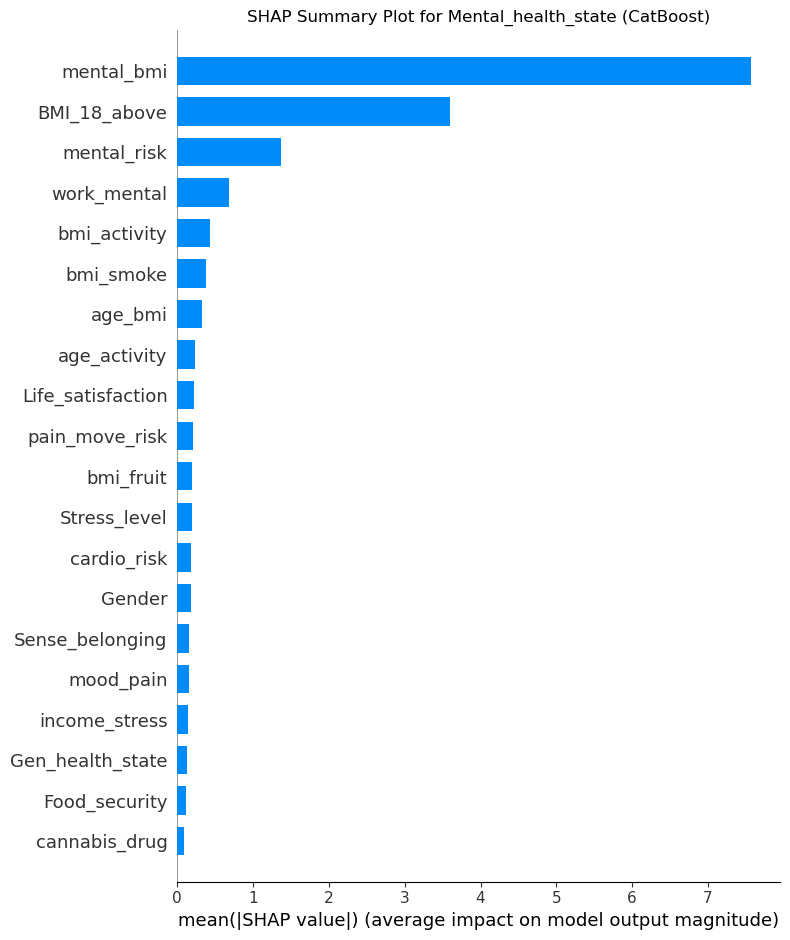

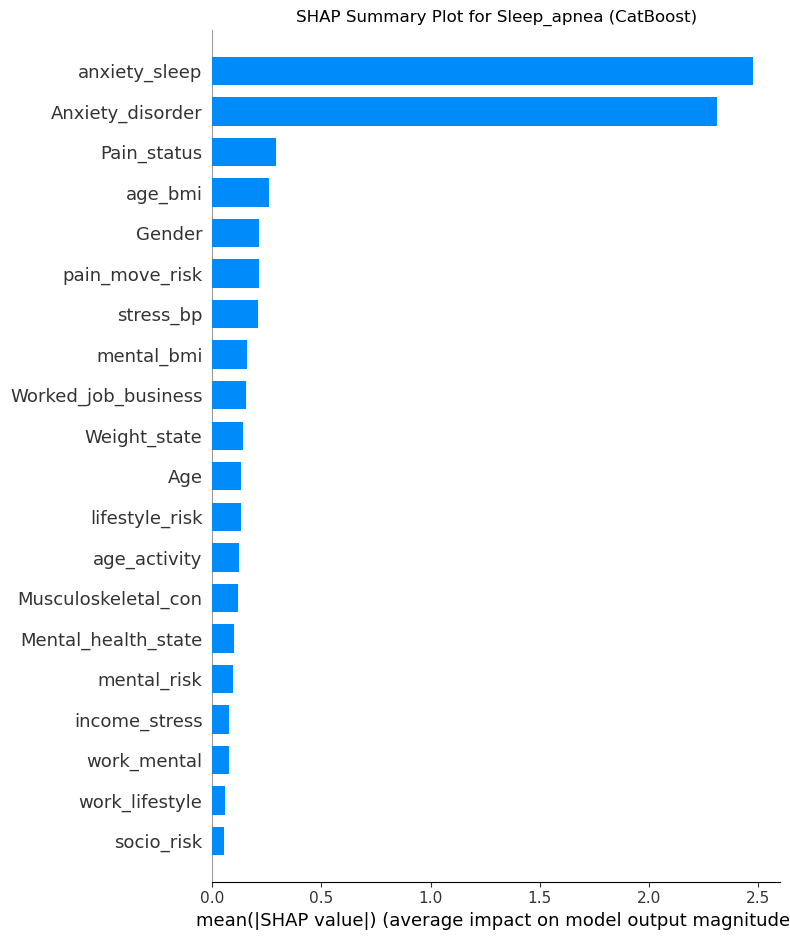

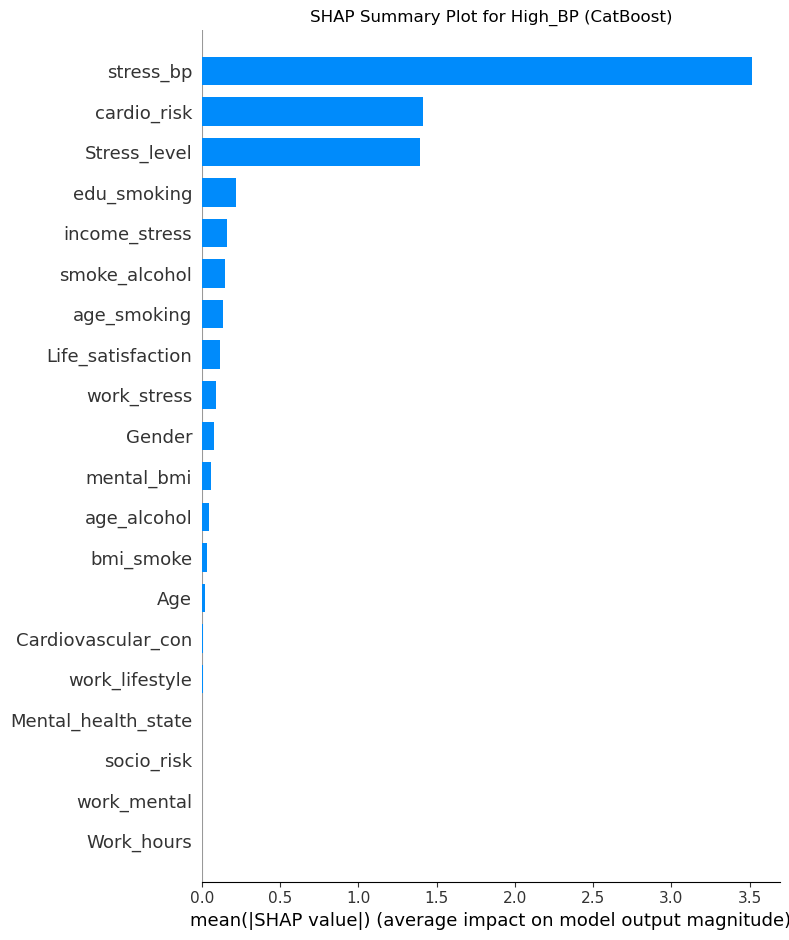

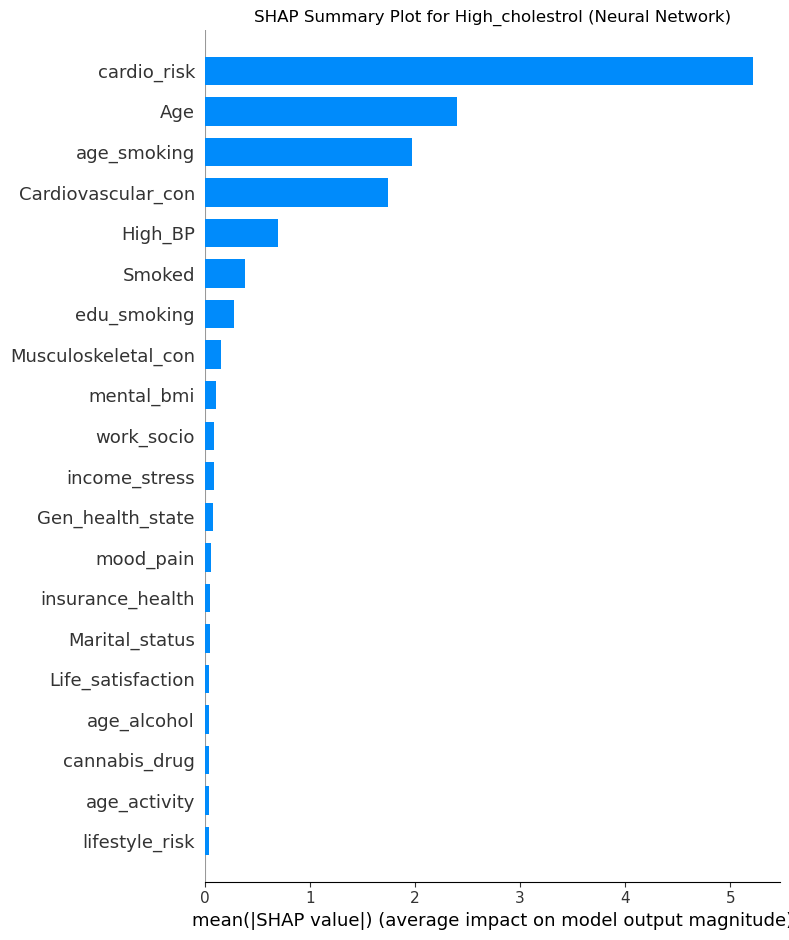

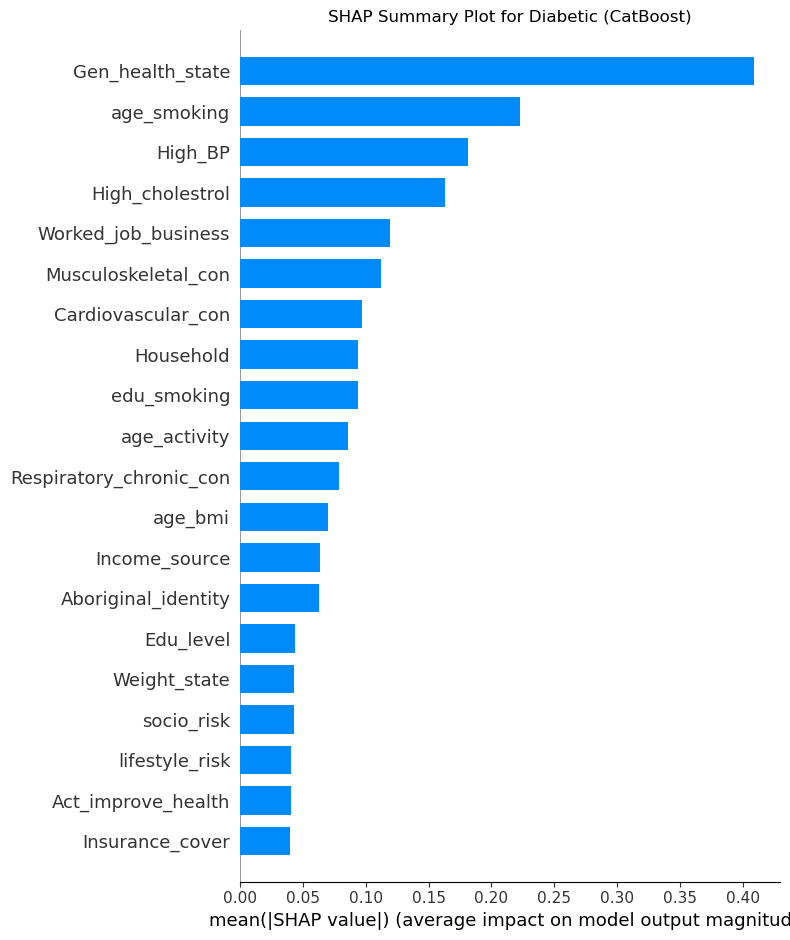

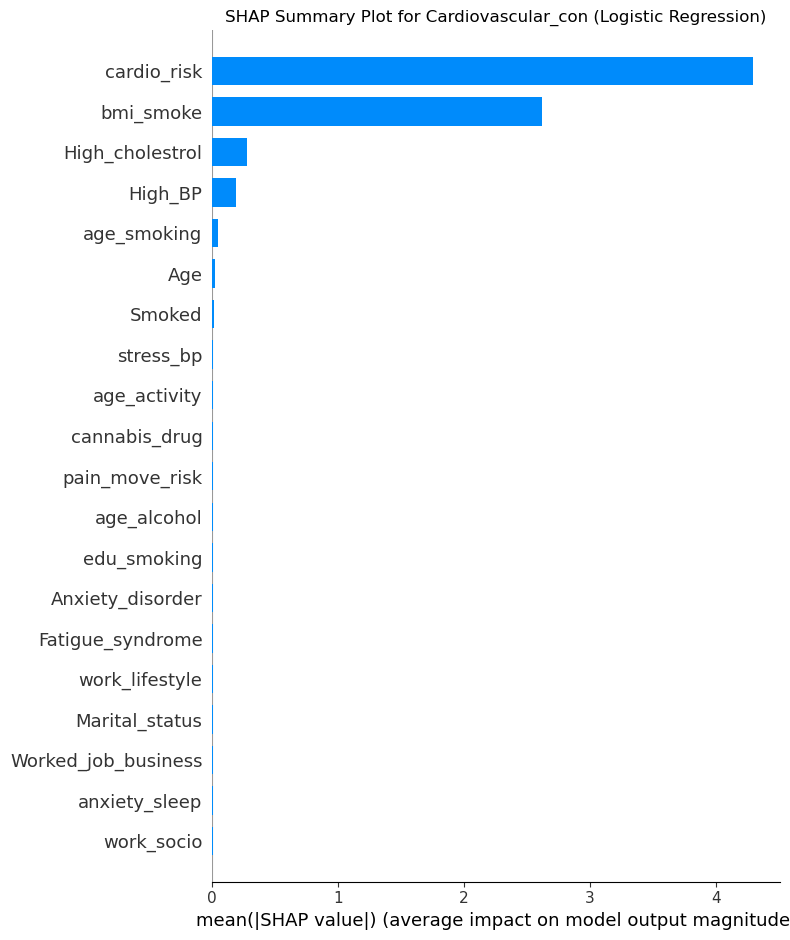

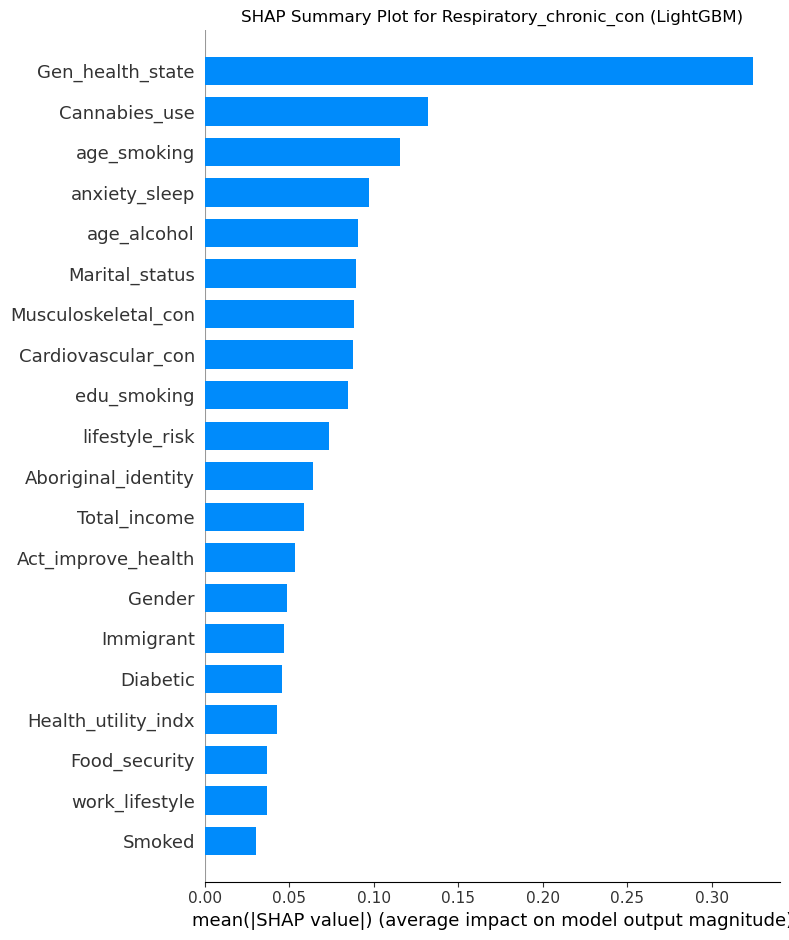

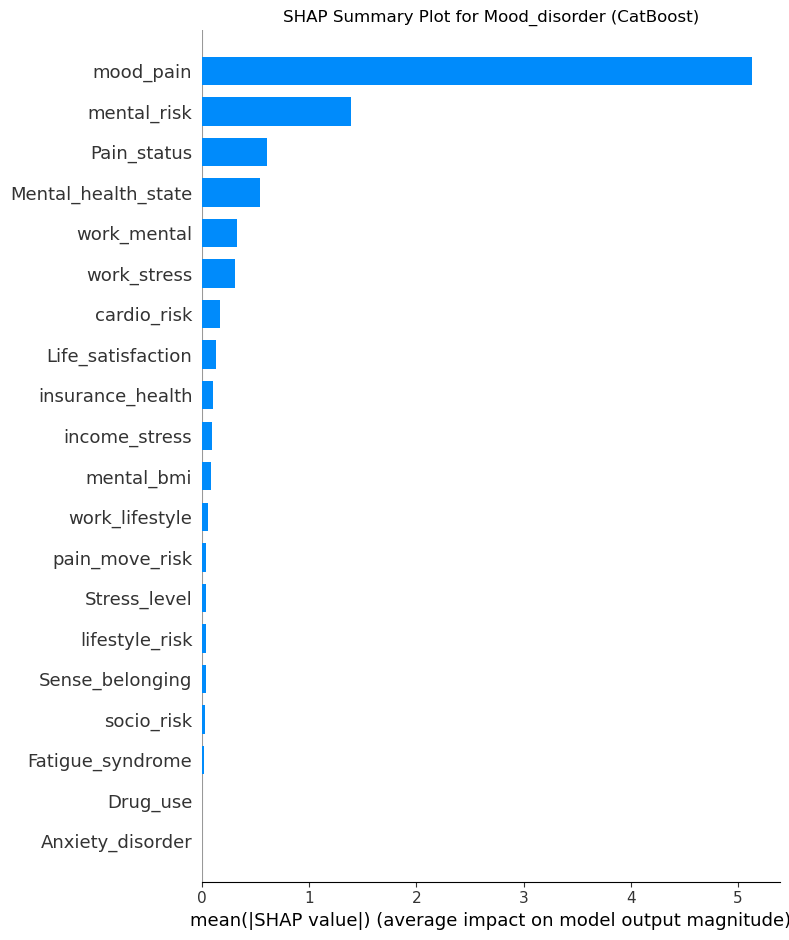

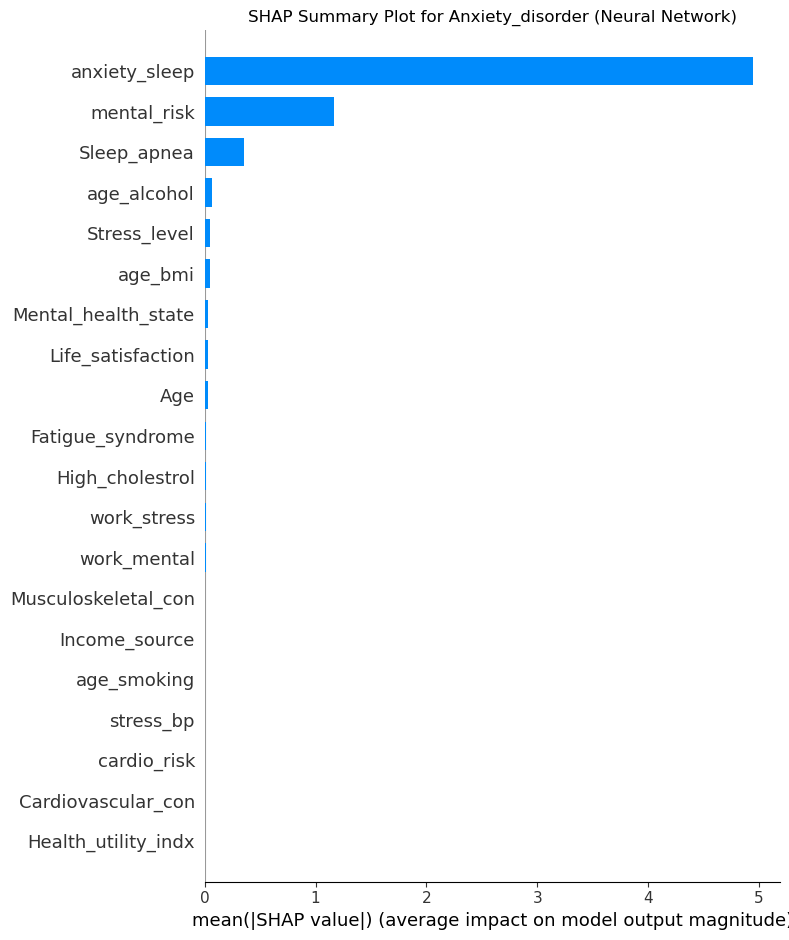

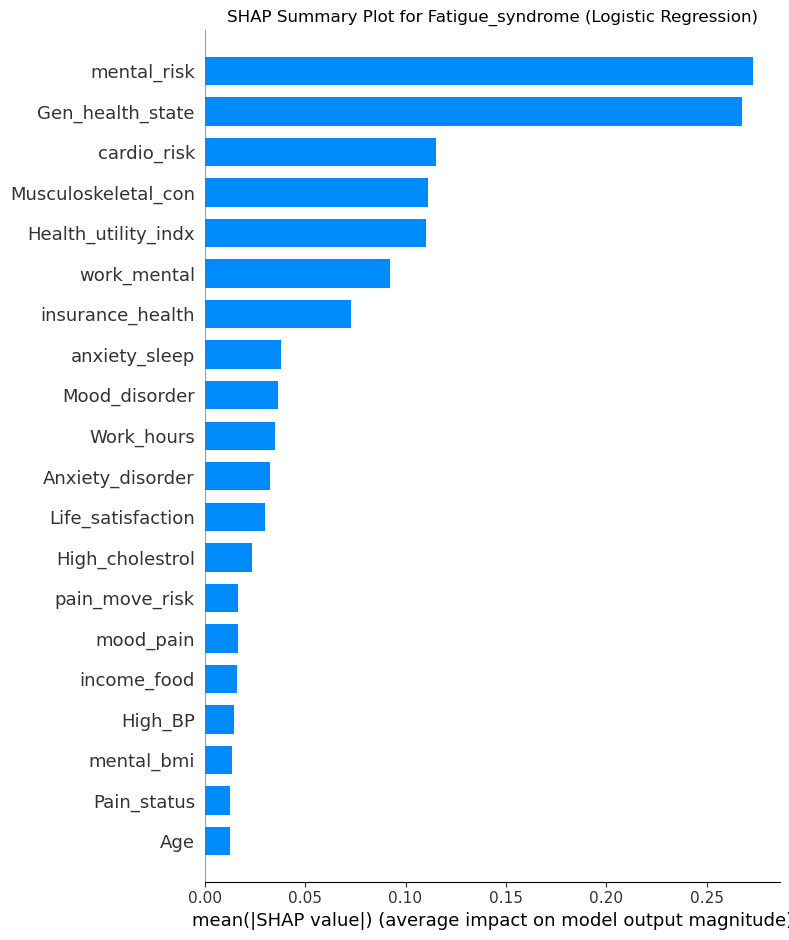


--- Summary of Results for All Targets ---
Target: Mental_health_state
  Best Model: CatBoost
  Best AUC: 1.0
  Best Hyperparameters: {'learning_rate': 0.45406912932464416, 'max_depth': 3.0, 'n_estimators': 700.0}
Target: Sleep_apnea
  Best Model: CatBoost
  Best AUC: 1.0
  Best Hyperparameters: {'learning_rate': 0.15161453853640003, 'max_depth': 4.0, 'n_estimators': 550.0}
Target: High_BP
  Best Model: CatBoost
  Best AUC: 1.0
  Best Hyperparameters: {'learning_rate': 0.04073390595355078, 'max_depth': 7.0, 'n_estimators': 550.0}
Target: High_cholestrol
  Best Model: Neural Network
  Best AUC: 1.0
  Best Hyperparameters: {'learning_rate': 0.14478517987278255, 'max_depth': 4.0, 'n_estimators': 150.0}
Target: Diabetic
  Best Model: CatBoost
  Best AUC: 0.8207134414340029
  Best Hyperparameters: {'learning_rate': 0.028764557545153006, 'max_depth': 4.0, 'n_estimators': 350.0}
Target: Cardiovascular_con
  Best Model: Logistic Regression
  Best AUC: 1.0
  Best Hyperparameters: {'learning_ra

In [28]:
target_columns = [
    'Mental_health_state',
    'Sleep_apnea',
    'High_BP',
    'High_cholestrol',
    'Diabetic',
    'Cardiovascular_con',
    'Respiratory_chronic_con',
    'Mood_disorder',
    'Anxiety_disorder',
    'Fatigue_syndrome'
]

results_all_targets = {}  # Store results for all target columns
shap_plots = {}

for target_column in target_columns:
    print(f"\n--- Analyzing target: {target_column} ---")

    # Creating X and y for train, validation, and test sets
    X_train = train_df.drop(target_column, axis=1)
    y_train = train_df[target_column]

    X_validation = validation_df.drop(target_column, axis=1)
    y_validation = validation_df[target_column]

    X_test = test_df.drop(target_column, axis=1)
    y_test = test_df[target_column]

    # Verifying shapes and types
    # print("X_train shape:", X_train.shape)
    # print("y_train shape:", y_train.shape)
    # print("y_train type:", type(y_train))
    # print("X_validation shape:", X_validation.shape)
    # print("y_validation shape:", y_validation.shape)
    # print("y_validation type:", type(y_validation))
    # print("X_test shape:", X_test.shape)
    # print("y_test shape:", y_test.shape)
    # print("y_test type:", type(y_test))

    # Verifying that target is binary
    threshold = 0.5 
    y_train = (y_train > threshold).astype(int)
    y_validation = (y_validation > threshold).astype(int)
    y_test = (y_test > threshold).astype(int)

    # print(f"{target_column} unique values: {y_train.unique()}")  # Verifying that it is only 0 and 1

    # 1. Model Selection
    models = {
        "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(random_state=42, verbose=-1, force_row_wise=True),
        "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
        "Neural Network": MLPClassifier(random_state=42, max_iter=500)
    }

    results = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        results[name] = scores.mean()
        print(f"{name}: AUC = {scores.mean()}")

    best_model_name = max(results, key=results.get)
    best_model = models[best_model_name]
    print(f"Best model: {best_model_name}")

    # 2. Hyperparameter Tuning (using Hyperopt)
    def objective(params):
        model = XGBClassifier(
            n_estimators=int(params['n_estimators']),
            learning_rate=params['learning_rate'],
            max_depth=int(params['max_depth']),
            random_state=42,
            eval_metric='logloss'
        )
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        return {'loss': -scores.mean(), 'status': STATUS_OK}

    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
        'learning_rate': hp.loguniform('learning_rate', -5, 0),
        'max_depth': hp.quniform('max_depth', 3, 10, 1),
    }

    trials = Trials()
    best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    best_xgb = XGBClassifier(
        n_estimators=int(best_params['n_estimators']),
        learning_rate=best_params['learning_rate'],
        max_depth=int(best_params['max_depth']),
        random_state=42,
        eval_metric='logloss'
    )
    best_xgb.fit(X_train, y_train)

     # 3. Model Explainability (using SHAP)
    explainer = shap.TreeExplainer(best_xgb)
    shap_values = explainer.shap_values(X_test)
    shap_plots[target_column] = (shap_values, X_test)  # Store SHAP data

    results_all_targets[target_column] = {
        "best_model": best_model_name,
        "best_params": best_params,
        "auc": results[best_model_name],
    }

# Displaying SHAP plots after the loop
# plt.figure(figsize=(15, 5 * len(target_columns)))
for target_column in target_columns:
    shap_values, X_test_plot = shap_plots[target_column]
    plt.figure(figsize=(15, 5)) #create new figure per target column
    shap.summary_plot(shap_values, X_test_plot, plot_type="bar", show=False)
    plt.title(f"SHAP Summary Plot for {target_column} ({results_all_targets[target_column]['best_model']})")
    plt.tight_layout()
    plt.show()

# Print summary of results for all target columns
print("\n--- Summary of Results for All Targets ---")
for target, result in results_all_targets.items():
    print(f"Target: {target}")
    print(f"  Best Model: {result['best_model']}")
    print(f"  Best AUC: {result['auc']}")
    print(f"  Best Hyperparameters: {result['best_params']}")